In [1]:
#Quantifying linkage between snp pairs in clusters

In [2]:
source("/home/users/mcbitter/OrchardProject/Code/config.R")
source("/home/users/mcbitter/OrchardProject/Code/helper_functions.R")
source("/home/users/mcbitter/OrchardProject/Code/load_packages.R")
source("/home/users/mcbitter/OrchardProject/Code/plotting_functions.R")
source("/home/users/mcbitter/OrchardProject/Code/workflow_functions.R")
source("/home/users/mcbitter/OrchardProject/Code/general_cage_functions.R")
source("/home/users/mcbitter/OrchardProject/Code/Orchard2021_Scripts/LOA/loa.orch2021.functions.R")
setwd('~/dpetrov/MarkB/Orchard2021Data/19_ClusterCovariance/')

In [3]:
##1. Egor Lappo computed correlations of allele frequencies w/in and btwnn clusters
##the resulting file: matched_snp_correlations.csv

In [11]:
#2. separating Egor's results into correlations between frequency vectors and delt p vectors
df = read.csv('./matched_snp_correlation_tables/matched_snp_correlations.csv')
df.freq = df %>% filter(corr_kind == 'freq')
write.csv(df.freq, './matched_snp_correlation_tables/matched_snp_correlations.Freqs.csv', row.names = FALSE)

df.delta = df %>% filter(corr_kind == 'delta_averep')
write.csv(df.delta, './matched_snp_correlation_tables/matched_snp_correlations.Delta.csv', row.names = FALSE)

In [4]:
##3. get rsq btwn pairs of snps on same chromosome and w/in same cluster

#3a. rsq btwn snps w/ in same cluster
source("/home/users/mcbitter/OrchardProject/Code/config.R")
source("/home/users/mcbitter/OrchardProject/Code/helper_functions.R")
source("/home/users/mcbitter/OrchardProject/Code/load_packages.R")
source("/home/users/mcbitter/OrchardProject/Code/plotting_functions.R")
source("/home/users/mcbitter/OrchardProject/Code/workflow_functions.R")
source("/home/users/mcbitter/OrchardProject/Code/general_cage_functions.R")
source("/home/users/mcbitter/OrchardProject/Code/Orchard2021_Scripts/LOA/loa.orch2021.functions.R")
setwd('~/dpetrov/MarkB/Orchard2021Data/19_ClusterCovariance/')

df = read.csv('./matched_snp_correlation_tables/matched_snp_correlations.Delta.csv')


In [5]:
#segregate into w/in and btwn cluster df's
df.btwn  = df %>% dplyr::select(position, comparison_position, cl, comparison_cl,  chrom)   %>%
   mutate(snpDist = abs(position - comparison_position)) %>% 
    rename(snp1.pos = position, snp2.pos = comparison_position, snp1.cl = cl, snp2.cl = comparison_cl)

df.within  = df %>% dplyr::select(position, pos_ctrl_position, chrom) %>%
    mutate(snpDist = abs(position - pos_ctrl_position)) %>% 
    rename(snp1.pos = position, snp2.pos = pos_ctrl_position)

In [7]:
df.within.rsq = data.frame()
    for (chr in as.character(unique(df.within$chrom))){
        snpFile= paste0("~/dpetrov/MarkB/Orchard2021Data/snptables/Orchard2021/inbredv2_withHets.orch2021.", chr, ".snpTable.numeric")
        df.within.chr = df.within %>% filter(chrom == chr)
        snppairs = calc_Rsq_for_snp_pairs(df.within.chr, ncores = 6, snpFile)
        snppairs = snppairs 
        df.within.rsq = rbind(df.within.rsq, snppairs)
    }
dim(df.within.rsq)
df.within.rsq = df.within.rsq %>% rename(position = snp1.pos, pos_ctrl_position = snp2.pos, Rsq.intra.pos.cntrl = Rsq)
dim(df.within.rsq)


3L ...225336 pairs...done.
2R ...205748 pairs...done.
2L ...302744 pairs...done.
3R ...275655 pairs...done.
X ...90511 pairs...done.


[1] 1099994       5

[1] 1099994       5

In [ ]:
write.csv(df.within.rsq, './df.within.rsq.csv' , row.names = FALSE)

In [ ]:
df.btwn.rsq = data.frame()
    for (chr in as.character(unique(df.btwn$chrom))){
        snpFile= paste0("~/dpetrov/MarkB/Orchard2021Data/snptables/Orchard2021/inbredv2_withHets.orch2021.", chr, ".snpTable.numeric")
        df.btwn.chr = df.btwn %>% filter(chrom == chr)
        snppairs = calc_Rsq_for_snp_pairs(df.btwn.chr, ncores = 6, snpFile)
        df.btwn.rsq = rbind(df.btwn.rsq, snppairs)
    }
df.btwn.rsq = df.btwn.rsq %>% rename(position = snp1.pos, comparison_position = snp2.pos, Rsq.intra.within = Rsq)%>%
    dplyr::select(position, comparison_position, Rsq.comparison)
write.csv(df.btwn.rsq, './df.btwn.rsq.csv' , row.names = FALSE)


In [23]:
#combine df.within and df.btwn to the freqs and delta correlation files
df.w = read.csv('./df.within.rsq.csv')

In [24]:
df.b = read.csv('./df.btwn.rsq.csv')


In [26]:
df.delta = left_join(df.delta, df.w)
df.delta = distinct(df.delta)
df.delta = left_join(df.delta, df.b)
df.delta = distinct(df.delta)

Joining with `by = join_by(position, chrom, pos_ctrl_position, snpDist)`
Warning message in left_join(df.delta, df.w):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 11 of `x` matches multiple rows in `y`.
ℹ Row 596 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


In [31]:
df.freq = left_join(df.freq, df.w)
df.freq = distinct(df.freq)
df.freq = left_join(df.freq, df.b)
df.freq = distinct(df.freq)


Joining with `by = join_by(position, chrom, pos_ctrl_position)`
Warning message in left_join(df.freq, df.w):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 11 of `x` matches multiple rows in `y`.
ℹ Row 596 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”
Joining with `by = join_by(position, comparison_position)`
Warning message in left_join(df.freq, df.b):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 63 of `x` matches multiple rows in `y`.
ℹ Row 1009605 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


In [38]:
write.csv(df.delta, './matched_snp_correlation_tables/matched_snp_correlations.Delta.csv', row.names = FALSE)
write.csv(df.freq, './matched_snp_correlation_tables/matched_snp_correlations.Freqs.csv', row.names = FALSE)

In [83]:
#4. Look at Rsq patterns as a funciton of distance btwn snps

In [50]:
df.d = read.csv('./matched_snp_correlation_tables//matched_snp_correlations.Delta.csv')

In [51]:
names(df.d)

[1] "snp"                        "comparison_snp"            
 [3] "pos_ctrl_snp"               "neg_ctrl_snp"              
 [5] "corr_kind"                  "corr_comparison"           
 [7] "corr_pos_ctrl"              "corr_neg_ctrl"             
 [9] "position"                   "chrom"                     
[11] "cl"                         "comparison_position"       
[13] "comparison_cl"              "pos_ctrl_position"         
[15] "neg_ctrl_position"          "neg_ctrl_chrom"            
[17] "neg_ctrl_cl"                "comparison_distance"       
[19] "comparison_distance_decile" "snpDist"                   
[21] "Rsq.pos.cntrl"              "Rsq.comparison"

In [52]:
df.d = df.d %>% mutate(snp.pos.dist = abs(position - pos_ctrl_position),
                      snp.comp.dist = abs(position - comparison_position))

In [79]:
dist.cntrl = df.d %>% dplyr::select(snp.pos.dist, Rsq.pos.cntrl)
names(dist.cntrl) = c('dist','Rsq')
dist.cntrl  = dist.cntrl %>% mutate(dist = dist/1000000)

dist.comp = df.d %>% dplyr::select(snp.comp.dist, Rsq.comparison)
names(dist.comp) = c('dist','Rsq')
dist.comp  = dist.comp %>% mutate(dist = dist/1000000)


In [80]:
dist = rbind(dist.cntrl, dist.comp)

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 1442 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 1442 rows containing non-finite values (`stat_smooth()`).”


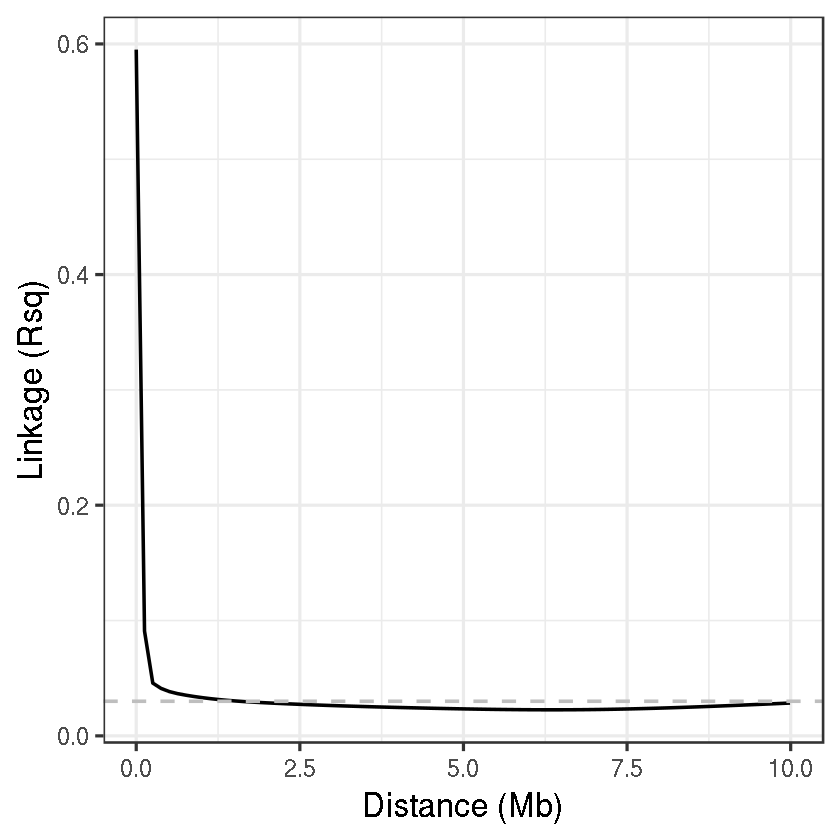

In [112]:
p = ggplot(na.omit(dist) %>% sample_n(10000), aes(x = dist, y = Rsq)) +
    geom_smooth(se = F, colour = 'black') +
    xlim(0,10) +
    ylab('Linkage (Rsq)') +
    theme_bw(base_size = 20) +
    xlab('Distance (Mb)') +
    geom_hline(yintercept = 0.03, linetype = 'dashed', colour = 'grey', size = 1)
p
ggsave( '../Figures/ClusterLinkage/Linkage.Meta.pdf', p, width = 10, height = 10)

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 17 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 17 rows containing non-finite values (`stat_smooth()`).”


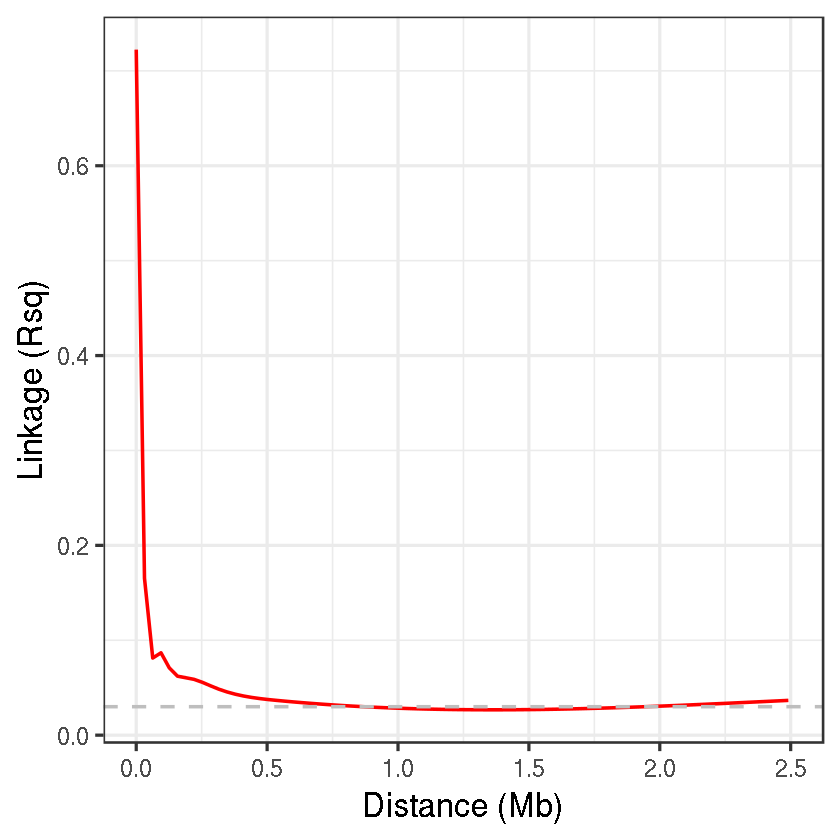

In [110]:
p = ggplot(dist.cntrl %>% sample_n(10000), aes(x = dist, y = Rsq)) +
    geom_smooth(se = F, colour = 'red') +
    xlim(0,2.5) +
    ylab('Linkage (Rsq)') +
    theme_bw(base_size = 20) +
    xlab('Distance (Mb)') +
    geom_hline(yintercept = 0.03, linetype = 'dashed', colour = 'grey', size = 1)

p
ggsave( '../Figures/ClusterLinkage/Linkage.IntraClust.pdf', p, width = 10, height = 10)

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 285 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 285 rows containing non-finite values (`stat_smooth()`).”


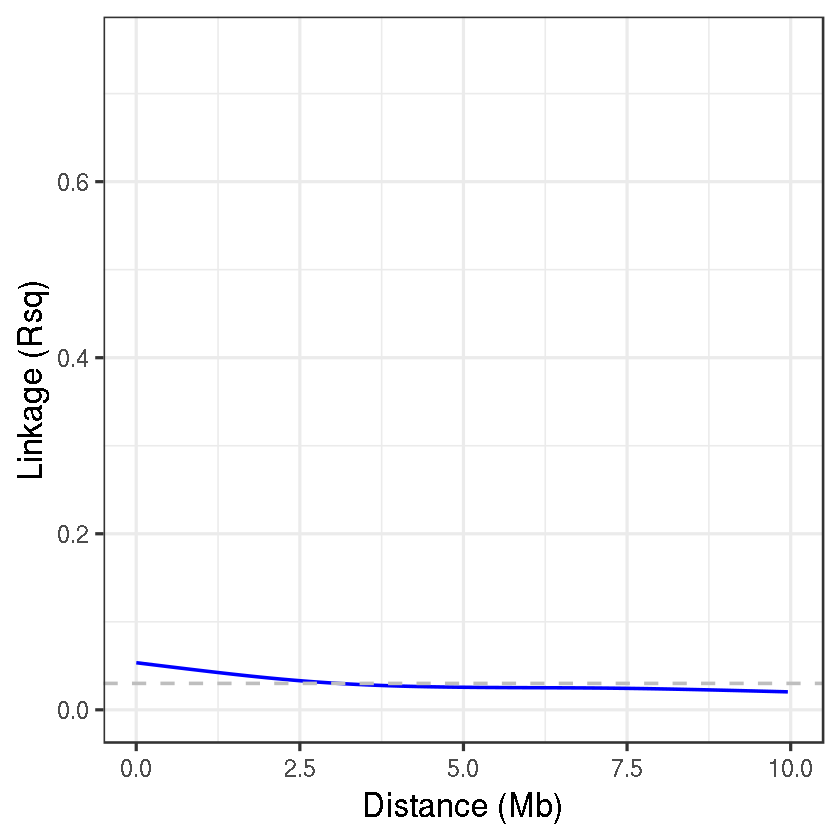

In [111]:
p = ggplot(dist.comp %>% sample_n(1000), aes(x = dist, y = Rsq)) +
    geom_smooth(se = F, colour = 'blue') +
    xlim(0,10) +
    theme_bw(base_size = 20) +
    ylim(0, 0.75) +
    ylab('Linkage (Rsq)') +
    xlab('Distance (Mb)') +
    geom_hline(yintercept = 0.03, linetype = 'dashed', colour = 'grey', size = 1)

p
ggsave( '../Figures/ClusterLinkage/Linkage.InterClust.pdf', p, width = 10, height = 10)